# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
#checking dataframe
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [4]:
df.count()

temperature    130
gender         130
heart_rate     130
dtype: int64

# 1. Is the distribution of body temperatures normal? 

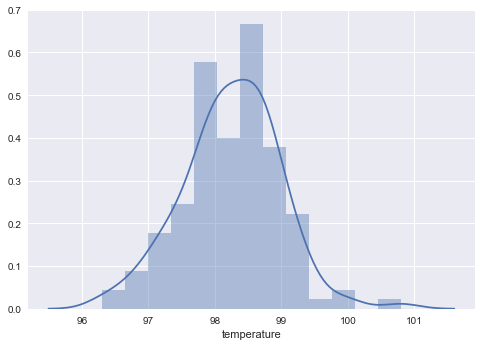

In [5]:
#plot histograph of temperature to see how it is distributed
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
_= sns.distplot(df['temperature'])
sns.plt.show()  

Based on this graphical representation, this distribution appears to be normal.  

In [6]:
#importing scipy stats package
from scipy import stats
import pylab

k,p = stats.shapiro(df['temperature'])
print("The test statistic is %s and the p-value is %s" % (k,p))

The test statistic is 0.9865770936012268 and the p-value is 0.233174666762352


Based on this p-value from the Shapiro-Wilk test, the sample does not appear to be from a normal distribution.

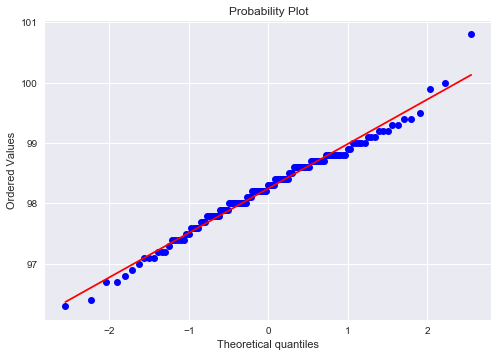

In [7]:
#creating the Q-Q plot to check for Normality

_=stats.probplot(df['temperature'], dist='norm', plot=pylab)
pylab.show()

Based on the Q-Q plot, this same distribution appears to be normal. 

In [8]:
#Creating an array of means from a given sample and size
def clt(sample,sample_size, iterations):
    means = np.empty(iterations)
    for i in range(iterations):
        new_sample = np.random.choice(sample,size=sample_size)
        n_mean = np.mean(new_sample)
        means[i]=n_mean
    return means    

In [9]:
n100000 = clt(df['temperature'],10000,10000)
n100000

array([ 98.25199,  98.2509 ,  98.25362, ...,  98.24232,  98.24461,
        98.24779])

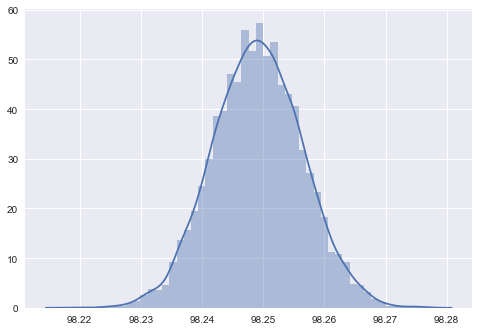

In [10]:
_ = sns.distplot(n100000)
sns.plt.show()

# 2. Is the sample size large? Are the observations independent?

The n in this sample is 130, which constitutes a large sample size.  The observations should be independent. 

# 3. Is the true population mean really 98.6 degrees F? 

In [35]:
#bootstrap test
temp = df['temperature']
def bootstrap_test(sample,iterations):
    means = np.empty(iterations)
    for i in range(iterations):
        new_sample = np.random.choice(sample,size=len(sample))
        n_mean = np.mean(new_sample)
        means[i]=n_mean
    mu = np.mean(means)
    std = np.std(means)
    return means, mu, std


In [37]:
bs_means, mu, std = bootstrap_test(temp,1000)
mu

98.245559230769231

Based on the bootstrap distribution, the mean of a bootstrap distribution with 100,000 iterations has a mean close to 98.25.  

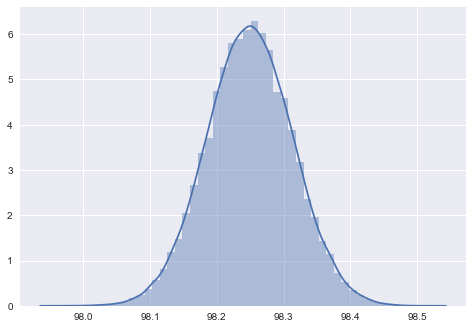

In [13]:
_ = sns.distplot(bs_means)
sns.plt.show()

# 3.1. Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?


I would use a one-sample test because the samples from the same population. 

# 3.2. In this situation, is it appropriate to use the t or z statistic? 

I would use a t statistic because in this case, I am using the sample standard deviation. 

In [14]:
stats.ttest_ind(df['temperature'],bs_means)

Ttest_indResult(statistic=-0.0054685370311743685, pvalue=0.99563677137405415)

It appears that the t-test between the original sample of the body temperatures and the means of a bootstrapped sample of 100,000 iterations gave a p-value of 0.92.  

# 3.3 Now try using the other test. How is the result be different? Why? 

In [15]:
def ztest(sample, mu):
    mean= np.mean(sample)
    std = np.std(sample)
    sqrtn = np.sqrt(len(sample))
    stdbar = std/sqrtn
    z = (mean-mu)/stdbar
    return z

In [16]:
zscore = ztest(df['temperature'],98.6)

In [17]:
stats.norm.sf(abs(zscore))*2

4.3523151658821886e-08

According to the z-test, the likelihood of getting a value as small or smaller has a probablity of 4.32e-8.  The test result gives a much smaller p-value because in this test, we do not factor in the sample size and assume a perfectly normal distribution and assume a population standard deviation.  In a t-test, the spread (sample standard deviation) is larger than in the z-test, therefore we would expect a smaller p-value given the t-score. 

# 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.

In [38]:
def bootstrap_test2(sample,sample_size, iterations):
    means = np.empty(iterations)
    for i in range(iterations):
        new_sample = np.random.choice(sample,size=sample_size)
        n_mean = np.mean(new_sample)
        means[i]=n_mean
    mu = np.mean(means)
    std = np.std(means)
    return means, mu, std

In [19]:
ten_means, ten_mu, ten_std = bootstrap_test2(df['temperature'],10,10)

In [20]:
len(ten_means)

10

In [21]:
stats.ttest_ind(df['temperature'],ten_means)

Ttest_indResult(statistic=0.85060383276551643, pvalue=0.3964629135180997)

In [22]:
zscoreten = ztest(ten_means,98.6)
stats.norm.sf(abs(zscoreten))*2

5.6375980464216611e-28

The t-test in this case is the correct one to use.  With a small sample such as 10, we have a large standard deviation between the points and cannot assume a perfectly normal distribution as we would on the z-test. The ztest tells us that this test is significant to 99% whereas the ttest tells us that this value is not even at 90%.  This shows us that, given a smaller sample size; we may have a large fluctuation of means and the ttest should be used when we do have a small sample size. 

# 5. At what temperature should we consider someone's temperature to be "abnormal”?

In [23]:
def ecdf (data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1)/n
    return x, y

x , y = ecdf(bs_means)

In [24]:
_ = plt.plot(x,y,marker='.',linestyle='none')
_ = plt.margins(0.02)

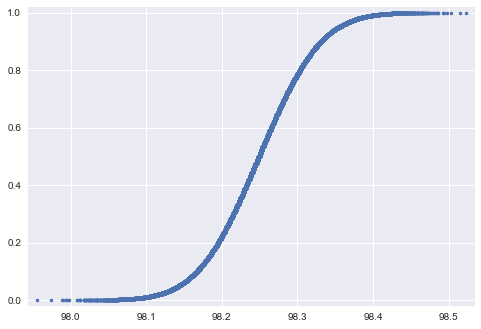

In [25]:
plt.show()

In [46]:
len(bs_means)

1000

In [44]:
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

In [45]:
mean_confidence_interval(bs_means)

(98.245559230769231, 98.241594645877399, 98.249523815661064)

It appears that body temperatures below 98.24 and above 98.25 are considered abnormal based on this bootstrap distribution. 

In [51]:
#separating male and female
male = df[df['gender']=='M']
female = df[df['gender']=='F']

In [52]:
#using one sample t-test to find significance
stats.ttest_ind(male['temperature'],female['temperature'])

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)

Based on our sample of men and women, when we assume that the body temperature between men and women were the same; the probability that these two temperatures were from the same population is 2.4%.  This is a statistically significant value for a confidence interval of 95%.  This means that the temperature between men and women are likely not the same.  